In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Maps with python

### Basemap
(The Matplotlib Basemap Toolkit)

### Cartopy
(A library providing cartographic tools for python)

### Mplleaflet
(Easily convert matplotlib plots from Python into interactive Leaflet web maps)

### Folium
(Python Data. Leaflet.js Maps)

### Bokeh
(Python interactive visualization library that targets modern web browsers for presentation)

## Basemap

### Pros
- the first widely used python mapping library;
- inspired by Matlab's `m_map` (easy learning curve);
- shipped as a `mpl_toolkit` (part of matplotlib);
- 25 different map projections;
- fully functional at install time: third party code sources (geos, proj.4 via pyproj), coastline, river, and political boundary data, etc.

### Cons
- the built-in data makes basemap a heavy download (>100mb);
- the shipped code can make it inconsistent with installed libraries;
- outdated political boundary data;
- does not handle the dateline properly.

### How to use

In [2]:
from mpl_toolkits.basemap import Basemap

m = Basemap()

[method for method in dir(m) if not method.startswith('_')]

['anchor',
 'arcgisimage',
 'area_thresh',
 'aspect',
 'ax',
 'barbs',
 'bluemarble',
 'boundarylats',
 'boundarylonmax',
 'boundarylonmin',
 'boundarylons',
 'boundinglat',
 'celestial',
 'coastpolygons',
 'coastpolygontypes',
 'coastsegs',
 'colorbar',
 'contour',
 'contourf',
 'drawcoastlines',
 'drawcounties',
 'drawcountries',
 'drawgreatcircle',
 'drawlsmask',
 'drawmapboundary',
 'drawmapscale',
 'drawmeridians',
 'drawparallels',
 'drawrivers',
 'drawstates',
 'ellipsoid',
 'epsg',
 'esq',
 'etopo',
 'fillcontinents',
 'fix_aspect',
 'flattening',
 'gcpoints',
 'hexbin',
 'imshow',
 'is_land',
 'lakepolygons',
 'landpolygons',
 'latmax',
 'latmin',
 'llcrnrlat',
 'llcrnrlon',
 'llcrnrx',
 'llcrnry',
 'lonmax',
 'lonmin',
 'lsmask',
 'makegrid',
 'nightshade',
 'noticks',
 'pcolor',
 'pcolormesh',
 'plot',
 'proj4string',
 'projection',
 'projparams',
 'projtran',
 'quiver',
 'readshapefile',
 'resolution',
 'rmajor',
 'rminor',
 'rotate_vector',
 'round',
 'scatter',
 'set_axes

### Basemap raster overlay

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


def make_map(lonStart=-48, lonEnd=-32, latStart=-30, latEnd=-18, img=None):
    m = Basemap(projection='merc', llcrnrlon=lonStart, urcrnrlon=lonEnd,
                llcrnrlat=latStart, urcrnrlat=latEnd, resolution='c',
                lat_ts=(latStart + latEnd) / 2.)

    fig, ax = plt.subplots(figsize=(6, 6), facecolor='w')
    m.ax = ax

    image = plt.imread(img)
    m.imshow(image, origin='upper', alpha=0.75)


    lonStart, latStart = -42, -26  # Crop the image.
    lon_lim, lat_lim = m([lonStart, lonEnd], [latStart, latEnd])
    m.ax.axis([lon_lim[0], lon_lim[1], lat_lim[0], lat_lim[1]])

    dx = dy = 2
    meridians = np.arange(lonStart, lonEnd + dy, dy)
    parallels = np.arange(latStart,  latEnd + dx, dx)
    xoffset = -lon_lim[0] + 1e4
    yoffset = -lat_lim[0] + 1e4
    kw = dict(linewidth=0)
    m.drawparallels(parallels, xoffset=xoffset, labels=[1, 0, 0, 0], **kw)
    m.drawmeridians(meridians, yoffset=yoffset, labels=[0, 0, 0, 1], **kw)
    return fig, m

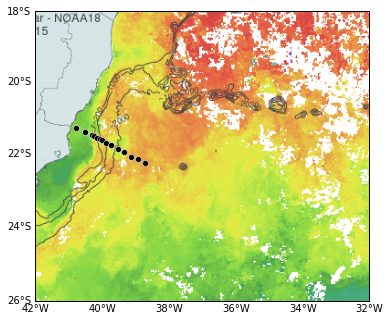

In [4]:
lon = [-40.77, -40.51, -40.30, -40.23, -40.13, -40.06, -39.99,
       -39.87, -39.72, -39.52, -39.32, -39.11, -38.91, -38.71]
lat = [-21.29, -21.39, -21.48, -21.51, -21.56, -21.58, -21.62,
       -21.69, -21.76, -21.86, -21.96, -22.08, -22.15, -22.25]

fig, m = make_map(img='./data/AVHRR.png')
kw = dict(marker='o', markerfacecolor='k', markeredgecolor='w', markersize=6, linestyle='none')
pts = m.plot(*m(lon, lat), **kw)

### Shipped data is a little bit outdated in some areas

(Brazil states boundaries seems to be stuck in 1943!)

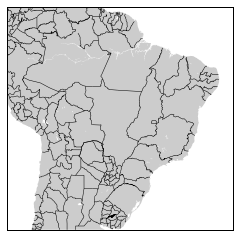

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots()
m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
            llcrnrlon=-77, urcrnrlon=-32, resolution='i', ax=ax)

m.fillcontinents()
m.drawcountries()
states = m.drawstates()

### Does not handle the dateline well

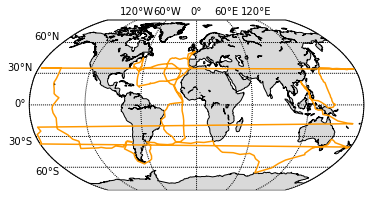

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

def make_basemap(projection='robin', figsize=(6, 4), resolution='c'):
    fig, ax = plt.subplots(figsize=figsize)
    m = Basemap(projection=projection, resolution=resolution,
                lon_0=0, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    parallels = np.arange(-60, 90, 30.)
    meridians = np.arange(-360, 360, 60.)
    m.drawparallels(parallels, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, labels=[0, 0, 1, 0])
    return fig, m


kw = dict(color='#FF9900', linestyle='-', linewidth=1.5)
lon, lat = np.loadtxt('./data/challenger_path.csv', delimiter=',', unpack=True)

fig, m = make_basemap()
pts = m.plot(*m(lon, lat), **kw)

## Cartopy

### Pros
- object oriented projection definitions (steeper learning curve for those coming from matlab);
- tight integration to expose advanced mapping in matplotlib;
- solves the dateline problem;
- download extra data on request.

### Cons
- fewer projections implemented than basemap;
- not all the functionality exists as methods and some work is needed to implement them (like basemap's `is_land`).

### How to use

{'_boundary',
 '_done_img_factory',
 '_get_extent_geom',
 '_gridliners',
 '_pcolormesh_patched',
 '_regrid_shape_aspect',
 'add_feature',
 'add_geometries',
 'add_raster',
 'add_wms',
 'add_wmts',
 'background_patch',
 'coastlines',
 'get_extent',
 'gridlines',
 'hold_limits',
 'img_factories',
 'natural_earth_shp',
 'outline_patch',
 'projection',
 'set_boundary',
 'set_extent',
 'set_global',
 'stock_img'}

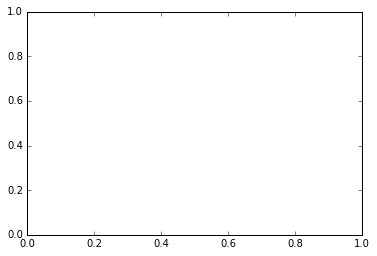

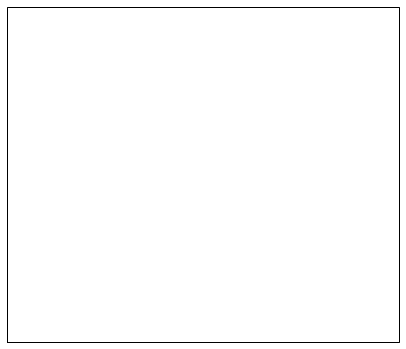

In [7]:
import cartopy.crs as ccrs

fig, default_ax = plt.subplots()
default_ax = set([method for method in dir(default_ax)])

fig, geo_axis = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=ccrs.Mercator()))

geo_axis = set([method for method in dir(geo_axis)])

geo_axis.difference(default_ax)

### Up-to-date external (on demand) data

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

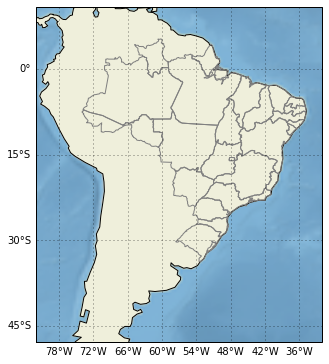

In [9]:
fig, ax = brazil_states()
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
states = ax.add_feature(states, edgecolor='gray')

### Nice dateline plotting

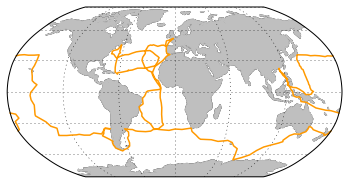

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def make_cartopy(projection=ccrs.Robinson(), figsize=(6, 4), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')
pts = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

### WMS, WTMS, Shapefile, raster, etc

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    subplot_kw = dict(projection=projection)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

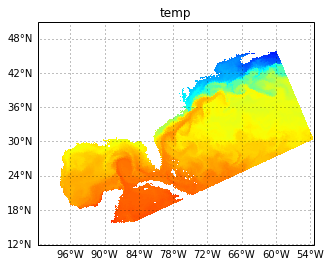

In [12]:
from owslib.wms import WebMapService

url = 'http://geoport-dev.whoi.edu/thredds/wms/coawst_4/use/fmrc/coawst_4_use_best.ncd'
wms = WebMapService(url)
layer = 'temp'

bbox = wms[layer].boundingBoxWGS84

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([bbox[0], bbox[2], bbox[1], bbox[3]])
ax.add_wms(wms, layer)
title = ax.set_title(layer)

### Leverage shapefile handling with `shapely`

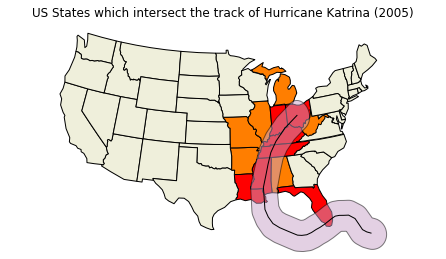

In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
        -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
        -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
        -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
        -85.3, -82.9]

lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
        25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
        25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
        35.6, 37.0, 38.6, 40.1]

ax = plt.axes([0, 0, 1, 1],
              projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('US States which intersect the track '
          'of Hurricane Katrina (2005)')

track = sgeom.LineString(list(zip(lons, lats)))

track_buffer = track.buffer(2)

for state in shpreader.Reader(states_shp).geometries():
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                  facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')

direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")

## Both basemap and cartopy are OK for 2D static maps (illustrations, papers, etc)
## What if we need interactive maps?

## Mplleaflet

### Pros
- dead simple matplotlib to leaflet conversion.

### Cons
- limited leaflet functionality;
- some awkward hacks to "make things work."

### Example

In [14]:
import gpxpy
from pandas import DataFrame

gpx = gpxpy.parse(open('./data/2014_08_05_farol.gpx'))
segment = gpx.tracks[0].segments[0]

data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])
    
columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = DataFrame(data, columns=columns)

In [15]:
import numpy as np
import seawater as sw
from oceans.ff_tools import smoo1

_, angles = sw.dist(df['Latitude'], df['Longitude'])
angles = np.r_[0, np.deg2rad(angles)]

# Normalize the speed to use as the length of the arrows.
r = df['Speed'] / df['Speed'].max()
kw = dict(window_len=31, window='hanning')
df['u'] = smoo1(r * np.cos(angles), **kw)
df['v'] = smoo1(r * np.sin(angles), **kw)

In [16]:
import mplleaflet
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df = df.dropna()
ax.plot(df['Longitude'], df['Latitude'],
        color='darkorange', linewidth=5, alpha=0.5)
sub = 10
ax.quiver(df['Longitude'][::sub], df['Latitude'][::sub], df['u'][::sub], df['v'][::sub], color='deepskyblue', alpha=0.8, scale=10)
mplleaflet.display(fig=fig, tiles='thunderforest_landscape')

## Folium

### Pros
- complete (!?) implementation of leaflet functionality in python.

### Cons
- higher complexity than mplleaflet for simple maps

In [17]:
import folium

mapa = folium.Map(location=[28.1, -81.6], zoom_start=5)

url = 'http://geoport-dev.whoi.edu/thredds/wms/coawst_4/use/fmrc/coawst_4_use_best.ncd'

folium.WmsTileLayer(name='coawst_4',
                    url=url,
                    layers='temp',
                    styles='boxfill/ferret',
                    format='image/png').add_to(mapa)
folium.LayerControl().add_to(mapa)
mapa

In [18]:
import geopandas

path = './data/{}'.format
hidro = geopandas.GeoDataFrame.from_file(path('ENC_Hidreletrica_P.shp'))
termo = geopandas.GeoDataFrame.from_file(path('ENC_Termeletrica_P.shp'))

gjson = hidro.to_crs(epsg='4326').to_json()

In [19]:
table = """
<!DOCTYPE html>
<html>
<head>
<style>
table {{
    width:100%;
}}
table, th, td {{
    border: 1px solid black;
    border-collapse: collapse;
}}
th, td {{
    padding: 5px;
    text-align: left;
}}
table#t01 tr:nth-child(odd) {{
    background-color: #eee;
}}
table#t01 tr:nth-child(even) {{
   background-color:#fff;
}}
</style>
</head>
<body>

<table id="t01">
  <tr>
    <td>Type</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Operational</td>
    <td>{}</td>
  </tr>
</table>
</body>
</html>
""".format

In [20]:
import folium

mapa = folium.Map([-15.783333, -47.866667],
                  zoom_start=4,
                  tiles='cartodbpositron')

In [21]:
from folium.element import IFrame
from folium.plugins import MarkerCluster

width, height = 310,110
popups, locations = [], []
for idx, row in hidro.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = row['NOME'].encode('ascii', 'xmlcharrefreplace')
    if row['OPERACIONA'] == 'Sim':
        opr = 'Yes'
    elif row['OPERACIONA'] == u'Não':
        opr = 'No'
    else:
        opr = 'NA'
    iframe = IFrame(table('Hydroelectric', name, opr), width=width, height=height)
    popups.append(iframe)
    
h = folium.FeatureGroup(name='Hydroelectric')
h.layer_name = 'Hydroelectric'
h.add_children(MarkerCluster(locations=locations, popups=popups))
mapa.add_children(h)

popups, locations = [], []
for idx, row in termo.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = row['NOME'].encode('ascii', 'xmlcharrefreplace')
    if row['OPERACIONA'] == 'Sim':
        opr = 'Yes'
    elif row['OPERACIONA'] == u'Não':
        opr = 'No'
    else:
        opr = 'NA'
    iframe = IFrame(table('Thermoelectric', name, opr), width=width, height=height)
    popups.append(iframe)

t = folium.FeatureGroup()
t.layer_name = 'Thermoelectric'
t.add_children(MarkerCluster(locations=locations, popups=popups))
mapa.add_children(t)

mapa.add_children(folium.LayerControl())
mapa

Folium maps can use a mix of GeoJSON, Text/HTML popups, WMS/WTMS/Raster layers, etc

- [IOOS Demonstration](http://nbviewer.jupyter.org/github/ocefpaf/sscsw/blob/master/IOOS_data_demo.ipynb)
- [Raster](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_image_overlay_gulf_stream.ipynb)
- [Choropleth](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_choropleth_negative_values.ipynb)
- [Heatmap](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_heatmap.ipynb)
- [Cesium 3D](http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/blob/master/test_3D.ipynb)

## Bokeh

### Pros
- mplleaflet+folium+more.

### Cons
- very complex for simple graphs (even more for mapping)!

In [22]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [23]:
from bokeh.io import output_file, show
from bokeh.models import GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool

map_options = GMapOptions(lat=30.29, lng=-97.73, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="Austin"
)

source = ColumnDataSource(
    data=dict(lat=[30.29, 30.20, 30.29],
              lon=[-97.70, -97.74, -97.78]))

circle = Circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
show(plot)

## Interactive mapping summary:
- mplleaflet for simple matplotlib &rarr; leaflet;
- folium from a complete leaflet python wrapper;
- bokeh if you feeling adventurous ;-)

## Links

- http://matplotlib.org/basemap/
- http://scitools.org.uk/cartopy/
- https://github.com/jwass/mplleaflet
- https://folium.readthedocs.org/en/latest/
- http://bokeh.pydata.org/en/latest/

## Examples

- http://matplotlib.org/basemap/users/examples.html
- http://scitools.org.uk/cartopy/docs/latest/gallery.html
- http://ocefpaf.github.io/python4oceanographers/
- http://nbviewer.jupyter.org/github/ocefpaf/folium_notebooks/tree/master/